In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [ ]:
# Loading Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/compresive_strength_concrete.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
# Checking For Null Values
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

Our Data Contains No Null Values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
# Renaming Columns
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)

In [ ]:
# Checking New DataFrame
df

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


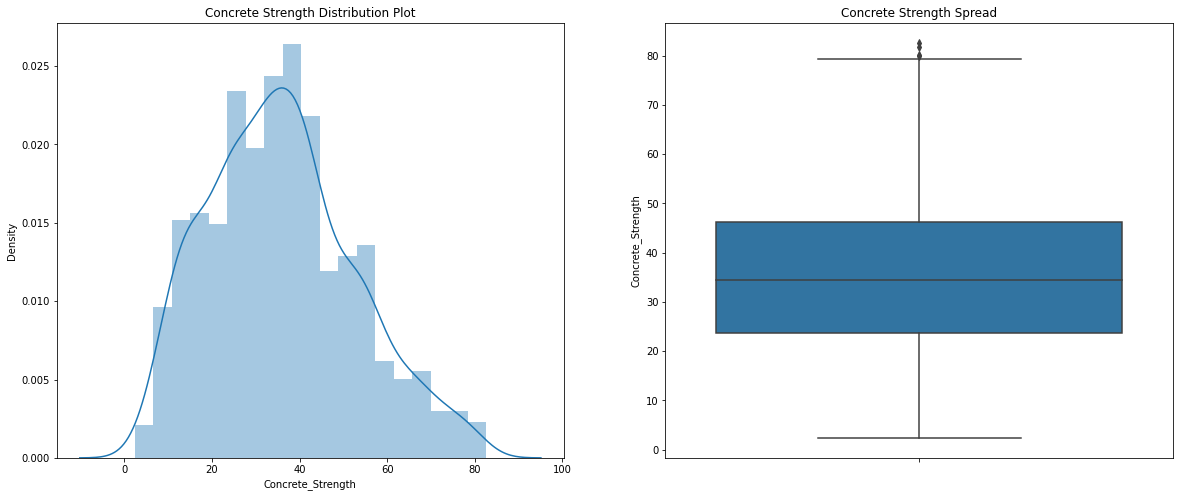

In [ ]:
# Visualizing The Data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Concrete Strength Distribution Plot')
sns.distplot(df.Concrete_Strength)

plt.subplot(1,2,2)
plt.title('Concrete Strength Spread')
sns.boxplot(y=df.Concrete_Strength)

plt.show()

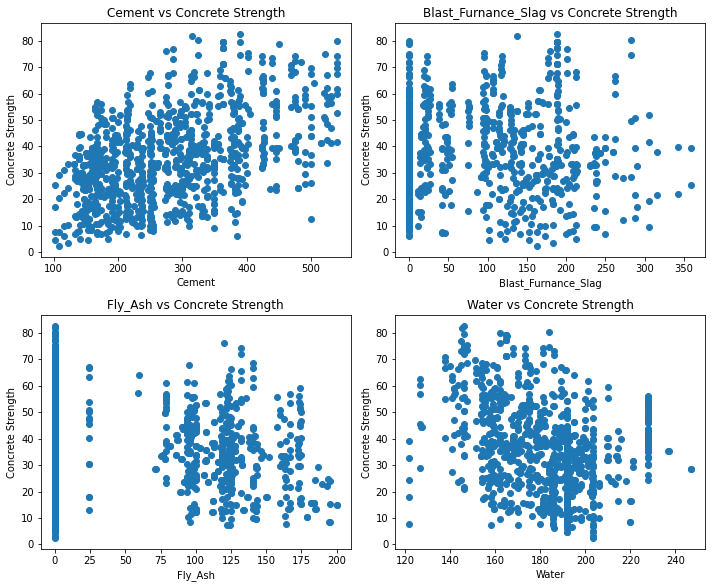

In [ ]:
# Plotting Some Important Numerical Features
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Concrete_Strength'])
    plt.title(x+' vs Concrete Strength')
    plt.ylabel('Concrete Strength')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Cement', 1)
scatter('Blast_Furnance_Slag', 2)
scatter('Fly_Ash', 3)
scatter('Water', 4)

plt.tight_layout()

In [ ]:
# Shuffling Data
df = df.sample(frac=1)

In [ ]:
df.shape

(1030, 9)

In [ ]:
# Splitting The Dataset Into Testing and Training Data
train_data = df.iloc[:721,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
408,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,3,20.73
384,516.0,0.0,0.0,162.0,8.2,801.0,802.0,28,41.37
320,249.1,0.0,98.8,158.1,12.8,987.8,889.0,14,28.68
241,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,28,24.54
1007,155.6,243.5,0.0,180.3,10.7,1022.0,697.7,28,37.36


In [ ]:
train_data.shape

(721, 9)

In [ ]:
test_data = df.iloc[721:,:]
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
367,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,56,53.96
792,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,360,42.13
905,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
230,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,14,30.39
899,145.0,0.0,134.0,181.0,11.0,979.0,812.0,28,13.20


In [ ]:
test_data.shape

(309, 9)

In [ ]:
# Separating Features From Test And Train Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [ ]:
train_labels.head()

408     20.73
384     41.37
320     28.68
241     24.54
1007    37.36
Name: Concrete_Strength, dtype: float64

In [ ]:
test_labels.head()

367    53.96
792    42.13
905    13.29
230    30.39
899    13.20
Name: Concrete_Strength, dtype: float64

In [ ]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [ ]:
# Checking Normalized Train Data
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
408,-0.966961,0.662859,0.979905,-0.085692,-0.429808,0.457092,-0.345462,-0.706626
384,2.238057,-0.847205,-0.862660,-0.936734,0.345680,-2.205036,0.337979,-0.285862
320,-0.292769,-0.847205,0.672293,-1.122156,1.121168,0.205461,1.415141,-0.521490
241,-0.476726,-0.847205,0.973691,0.641735,-0.008347,0.725498,-0.211746,-0.285862
1007,-1.179364,1.985618,-0.862660,-0.066674,0.767141,0.646783,-0.953378,-0.285862


In [ ]:
# Checking Normalized Test Data
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
367,-0.617064,-0.221308,1.031174,-1.241017,0.581698,0.547421,0.073021,0.185393
792,0.654513,-0.847205,-0.862660,0.489594,-1.036712,0.969387,0.387503,5.301875
905,-1.374700,-0.847205,1.716310,-0.080937,0.649132,-0.140371,0.375122,-0.285862
230,-0.628443,0.294068,-0.482029,-0.000112,0.126520,1.211985,0.132451,-0.521490
899,-1.279877,-0.847205,1.219159,-0.033393,0.817716,0.091904,0.461790,-0.285862


In [ ]:
# Making Base Model

model = tf.keras.models.Sequential()
model.add(Dense(10, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training Model on Train Data
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [ ]:
# Feeding History In DataFrame 
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,991.962891,991.962891,26.966164,865.482239,865.482239,24.968281,95
96,981.463013,981.463013,26.782696,855.801392,855.801392,24.783316,96
97,971.435791,971.435791,26.604479,846.467163,846.467163,24.601440,97
98,961.934875,961.934875,26.431686,837.743774,837.743774,24.428705,98
99,953.070007,953.070007,26.270245,829.604248,829.604248,24.265797,99


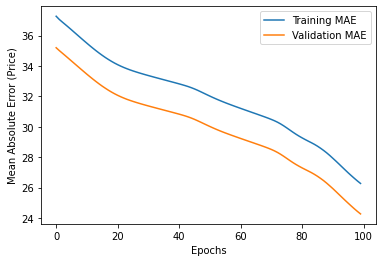

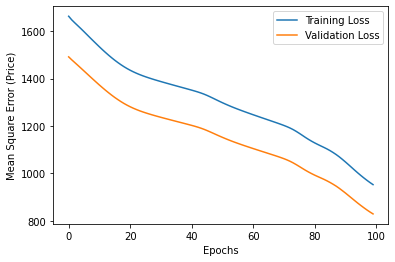

In [ ]:
# plotting loss on validation data
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)


In [ ]:
# Making Predictions on Test Data
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [ ]:
test_score = model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 959.5479 - mse: 959.5479 - mae: 25.9067


In [ ]:
print(f"Mean Squared Error: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[2]}")

Mean Squared Error: 959.5478515625
Mean Absolute Error: 25.90669822692871


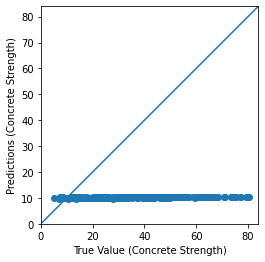

In [ ]:

# Making Price Predictions On Test Data

plt.scatter(test_labels, predictions)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

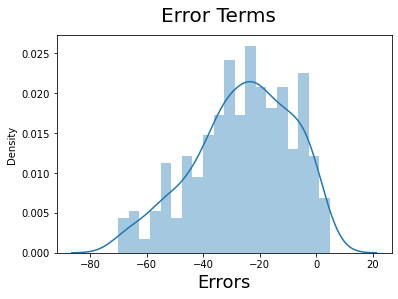

In [ ]:
# Plotting Difference Between Actual Values And Predicted Values

fig = plt.figure()
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)

**Making Second Model For Validation Data**

In [ ]:
#Making Second Model For Validation Data
from tensorflow.keras.models import Sequential
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation = 'sigmoid'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
__________________________________________________

In [ ]:
history_1 = model2.fit(train_data, train_labels, epochs=500, verbose = 0, validation_split=0.2)

In [ ]:
# Feeding history_1 In DataFrame
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
495,65.219078,65.219078,5.859002,63.241940,63.241940,5.877199,495
496,59.745720,59.745720,5.626475,56.770218,56.770218,5.401886,496
497,55.308315,55.308315,5.402687,55.982098,55.982098,5.197157,497
498,53.187019,53.187019,5.217278,50.512554,50.512554,5.081299,498
499,53.967190,53.967190,5.357416,49.974751,49.974751,5.143750,499


In [ ]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()

In [ ]:
test1_score = model2.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 56.3611 - mse: 56.3611 - mae: 5.5574


In [ ]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 56.36106872558594
Mean Absolute Error: 5.557389736175537


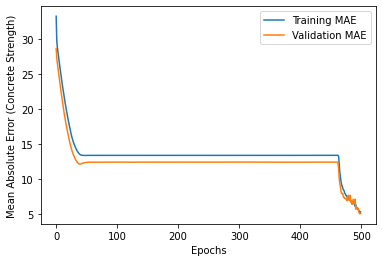

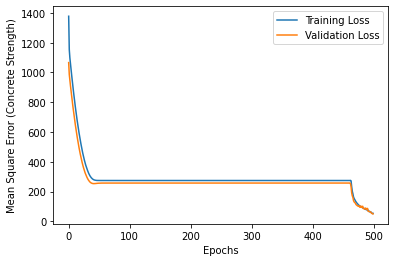

In [ ]:

# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

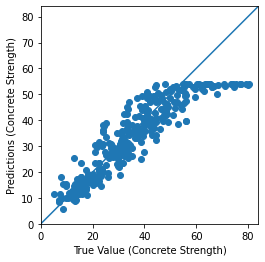

In [ ]:
plt.scatter(test_labels, predictions1)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

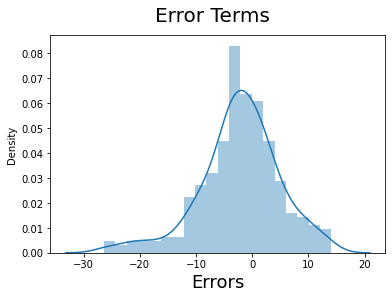

In [ ]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions1 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Buliding Third Model For Overcoming Overfitting

In [ ]:
# Overcoming Overfitting 
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
# Building Third Model

from tensorflow.keras.models import Sequential
model3 = Sequential()
model3.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(64, activation = 'sigmoid'))
model3.add(Dense(1,))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)

In [ ]:
history_2_df = pd.DataFrame(history_2.history)
history_2_df['epochs'] = history_2.epoch
history_2_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,47.045753,47.045753,5.121304,47.219467,47.219467,5.089785,95
96,45.710526,45.710526,5.049898,45.284958,45.284958,4.923091,96
97,43.726467,43.726467,4.966826,45.327816,45.327816,5.016757,97
98,42.861771,42.861771,4.880636,43.815575,43.815575,5.000598,98
99,43.274990,43.274990,4.913771,42.918304,42.918304,4.973936,99


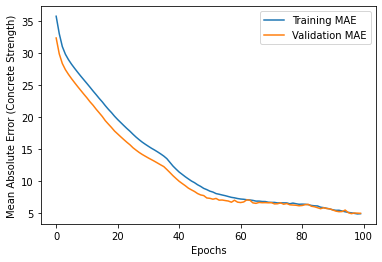

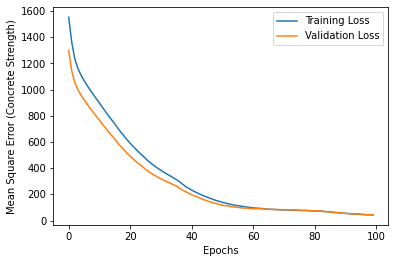

In [ ]:
# Plotting Validation Loss After Overcoming Overfitting
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['mae'], label = 'Training MAE')
  plt.plot(history_2_df['epochs'], history_2_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'], label = 'Training Loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_2_df)

In [ ]:
predictions3 = model3.predict(test_data)
predictions3 = predictions3.flatten()

In [ ]:
print(predictions3.shape)
print(test_labels.shape)

(309,)
(309,)


In [ ]:
test2_score  = model3.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 46.5951 - mse: 46.5951 - mae: 5.2359


In [ ]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[2]}")

Loss: 46.59514236450195
Mean Absolute Error: 5.2358551025390625


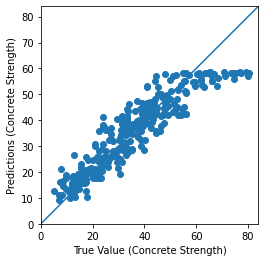

In [ ]:
plt.scatter(test_labels, predictions3)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

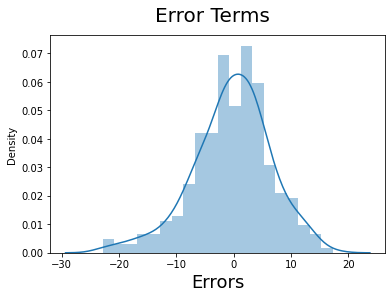

In [ ]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions3 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Final Loss: 32.794 <br>
Final Mean Absolute Error: 4.061

In [ ]:
# Saving Appropriate Model
model3.save('ConcreteStrengthModel.h5')

In [ ]:
# Saving Model In CSV File
from google.colab import files
df.to_csv('Concrete_Strength_Assignment.csv', index=False)
files.download('Concrete_Strength_Assignment.csv')
print("Your File Was Saved Successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your File Was Saved Successfully!
